In [1]:
from qiskit import *
import numpy as np
import random

In [2]:
n = 10
abc = sorted(np.random.choice(np.arange(2,n),3,False))
a,b,c = abc[0], abc[1], abc[2]
a,b,c

(2, 5, 9)

### State Preperation

In [3]:
def q_idx_tau(i):
    return 2*(i-1)
def q_idx_omega(i):
    return 2*i-3

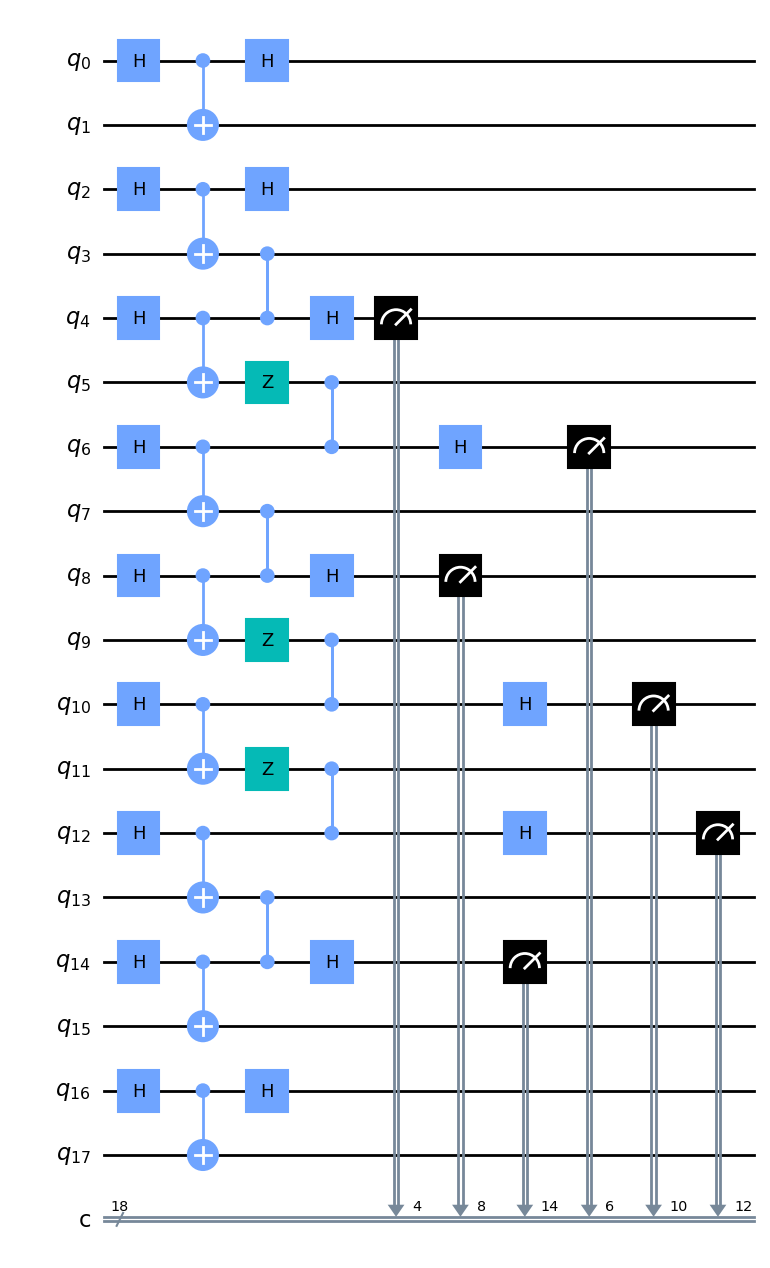

In [15]:
qc = QuantumCircuit(n*2-2,n*2-2)
for i in range(n-1):
    qc.h(2*i)
    qc.cx(2*i,2*i+1)
    
o = {}
# N_1
o[1] = random.randint(0,1)
if o[1]==1:
    qc.z(q_idx_tau(1))
qc.h(q_idx_tau(1))

for i in range(2,n):
    if i==a or i==c:

        # 1
        if o[i-1] == 1:
            qc.z(q_idx_omega(i))

        # 2b
        o[i] = random.randint(0,1)
        if o[i] == 1:
            qc.z(q_idx_tau(i))
        qc.h(q_idx_tau(i))

    else:

        # 1
        if o[i-1] == 1:
            qc.z(q_idx_omega(i))

        # 2a
        qc.cz(q_idx_tau(i),q_idx_omega(i))
        qc.h(q_idx_tau(i))
        qc.measure(q_idx_tau(i),q_idx_tau(i))
        backend = BasicAer.get_backend('qasm_simulator')
        result = backend.run(transpile(qc, backend), shots=1).result()
        counts  = result.get_counts(qc)

        o[i] = int(list(counts.keys())[0][::-1][q_idx_tau(i)]=='1')

if o[n-1] == 1:
    qc.z(q_idx_omega(n))

qc.draw('mpl')